# Individual Project - Titanic


## Table of Contents

[**Step 3: Data Preparation**](#Step-3:-Data-Preparation)
- [**Deal with Missing Data**](#Deal-with-Missing-Data)
- [**Feature Engineering**](#Feature-Engineering)

[**Step 4: Modeling**](#Step-4:-Modeling)


[Back to Top](#Table-of-Contents)


This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
 we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation
Create new features through feature engineering; Deal with missing values; Clean up data, ie. strip extra white spaces in string values. We will focus on dealing with missing data in this phrase.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic-igp.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [3]:
#check all missing data
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
#Removing the dollar sign from the fare column

df_titanic['Fare'] = df_titanic['Fare'].replace('[\$,]', '', regex=True).astype(float)


### Deal with Missing Data
We will demonstrate filling with mean/mode and estimate from other columns.

#### Fill with Mean/Mode
Embarked only has 2 missing values and there is no obvious way to estimate the missing walue, we will simply fill it with mode of the column, or 'S'

##### Task12: Fill missing Embarked with mode

In [13]:
# FILLING MISSING VALUES IN EMBARKED WITH 'S'

df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0],inplace=True)


#### Fill with Estimated Value

A title is a word used in a person's name, in certain contexts. It may signify either veneration, an official position, or a professional or academic qualification. It's a good indication of age, for example, Mr is for adult man, Master is for young boys.

If we look at all names of Titanic passengers, we can see that the name is in format Last, Title. First. We can use this information to estimate missing ages.

- First, we will use regular expression to extract title from name.
- Then we will convert title to upper case.
- Then we fill missing age with mean age of specific title.

In [27]:
# Extracting titles and assign to a new column in the DataFrame
df_titanic['Title'] = df_titanic['Name'].str.extract('([A-Za-z]+\.)')
df_titanic['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

##### Task13: convert title to upper case.
To ensure we get accurate mean age of each initial, we convert initial to all upper case.

In [26]:
# Converting titles to uppercase
df_titanic['Title'] = df_titanic['Title'].str.upper()
df_titanic['Title']

0        MR.
1       MRS.
2      MISS.
3       MRS.
4        MR.
       ...  
886     REV.
887    MISS.
888    MISS.
889      MR.
890      MR.
Name: Title, Length: 891, dtype: object

##### Task14: Fill missing age with mean age of the title

In [8]:
df_titanic.Title.value_counts()

Title
MR.          517
MISS.        182
MRS.         125
MASTER.       40
DR.            7
REV.           6
MLLE.          2
MAJOR.         2
COL.           2
COUNTESS.      1
CAPT.          1
MS.            1
SIR.           1
LADY.          1
MME.           1
DON.           1
JONKHEER.      1
Name: count, dtype: int64

In [9]:
# Filling the missing values in the age column with the mean of the different titles

df_titanic['Age'].fillna(df_titanic.groupby('Title')['Age'].transform('mean'), inplace=True)


In [10]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Feature Engineering
We'll create a new column FamilySize. There are 2 columns related to family size, parch indicates parent or children number, Sibsp indicates sibling and spouse number.

Take one name 'Asplund' as example, we can see that total family size is 7(Parch + SibSp + 1), and each family member has same Fare, which means the Fare is for the whole group. So family size will be an important feature to predict Fare. There're only 4 Asplunds out of 7 in the dataset becasue the dataset is only a subset of all passengers.

In [14]:
# Filter rows where the 'Name' contains 'Asplund'
asplund_passengers = df_titanic[df_titanic['Name'].str.contains('Asplund')]

asplund_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,MRS.
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,MASTER.
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,MISS.
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,MASTER.


##### Task15: Create column 'FamilySize'
FamilySize = Parch + SibSp + 1

In [16]:
# Creating a new column called FamilySize

df_titanic['FamilySize'] = df_titanic['Parch'] + df_titanic['SibSp'] + 1

In [17]:
# Preview the data 

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,MR.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,MRS.,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,MISS.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,MRS.,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,MR.,1


[Back to Top](#Table-of-Contents)

## Step 4: Modeling

Now we have a relatively clean dataset(Except for Cabin column which has many missing values). We can do a classification on Survived to predict whether a passenger could survive the desaster or a regression on Fare to predict ticket fare. This dataset is not a good dataset for regression. But since we don't talk about classification in this workshop we will construct a linear regression on Fare in this exercise.

##### Task16: Contruct a regresson on Fare
Construct regression model with statsmodels.

Pick Pclass, Embarked, FamilySize as independent variables.

In [21]:
import statsmodels.formula.api as smf

result =smf.ols("Fare ~ C(Pclass) + C(Embarked) + FamilySize", data=df_titanic).fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.92e-104
Time:                        22:54:35   Log-Likelihood:                -4495.8
No. Observations:                 891   AIC:                             9004.
Df Residuals:                     885   BIC:                             9032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           79.2989      3.543     22.381      0.000      72.345      86.253
C(Pclass)[T.2]     -59.0955      3.921    -15.073      0.000     -66.790     -51.401
C(Pclass)[T.3]     -68.8790      3.253    -21.174      0.000     -75.264     -62.494
C(Embarked)[T.Q]   -11.8147      5.446     -2.169      0.030     -22.504      -1.126
C(Embarked)[T.S]   -14.9202      3.414     -4.371      0.000     -21.620      -8.220
FamilySize           7.8256      0.789      9.919      0.000       6.277       9.374
==============================================================================
Omnibus:                     1043.506   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118621.734
Skew:                           5.718   Prob(JB):                         0.00
Kurtosis:                      58.357   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

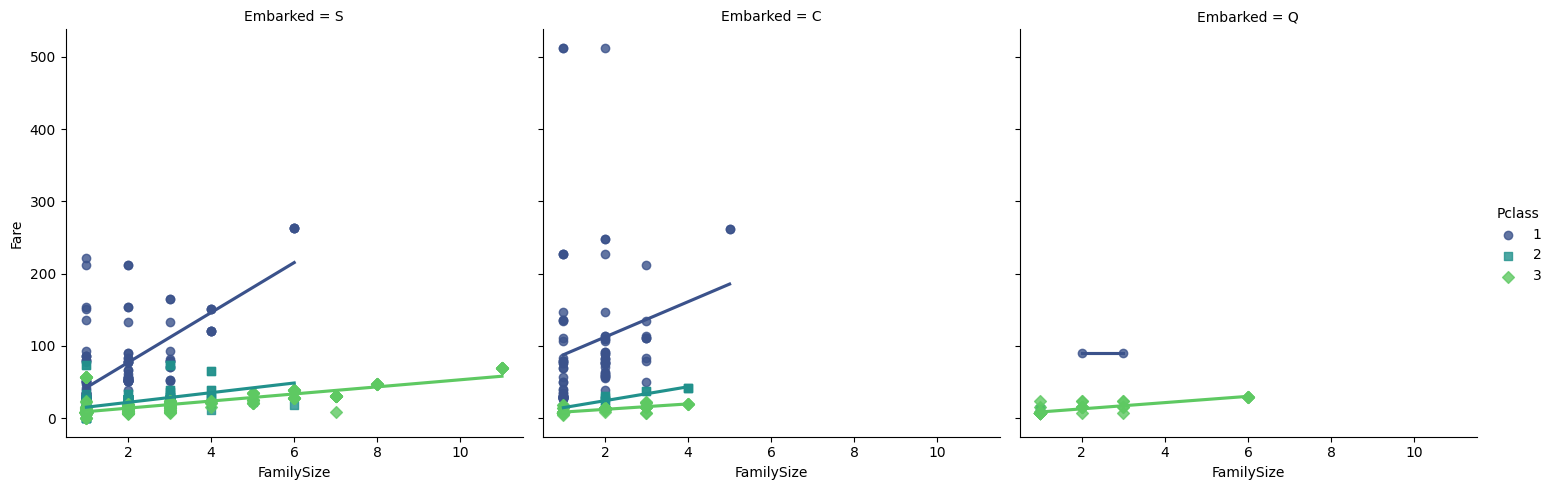

In [19]:
sns.lmplot(x='FamilySize', y='Fare', hue='Pclass', col='Embarked', data=df_titanic, ci=None, markers=["o", "s", "D"], palette="viridis") 

# Display the plot
plt.show()

## Observations
- Based on the R-Squared of our regression model, we can see that the model will perform poorly in predicting the Fare since it can only predict about 42% 
- The visual shows that more people of the 3rd class embarked on station Q as well as station S
- The larger the family size the higher the Fare
- Passengers in the first class paid higher fares followed by passengers in the second class followed by passengers in the third class

Conclusion: